In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from IPython.display import Markdown
from ipy_table import * 



The problem: tracking animal and predicting location based on video frame/feed.
* long term: tracking and discriminating between similarly shaped but visually different targets
    * example: 3 guinea pigs (add pics?)

The solution:
* Train CNN with each individual target
    * track all rabbits/guinea pigs to:
    * track this specific trained subject/target
        * link tracking data to specific trained user

The approach:
* isolate subject
* Scan with camera and thermal camera simultaneously
    * thermal cam is generating our target data
        * note this isn't what we're actually trying to predict!
    * Each video frame is our predictors
    
The underlying idea:

* We want to predict location ( $y_{want}$)
    * this is hard (read: annoying) to measure
* Second dependent variable that is highly correlated to $y_{want}$
    * easily measured **but** impractical to implement 
        * low resolution, limited range, high cost, only good at measuring heat
    * Able to be used in a contrived situation that compensates/side-steps the limitations
# TODO: Graph of example toy scatter data with green actual and red easy
    * photo of cinnabun, location circle (green) and heat map
    

In [11]:
x = np.linspace(.3, .7, 20)
y_want = x + np.random.normal(scale=.1, size=20)
y_easy = y_want + np.random.normal(scale=0.01, size=20)

Text(0, 0.5, 'Target Y')

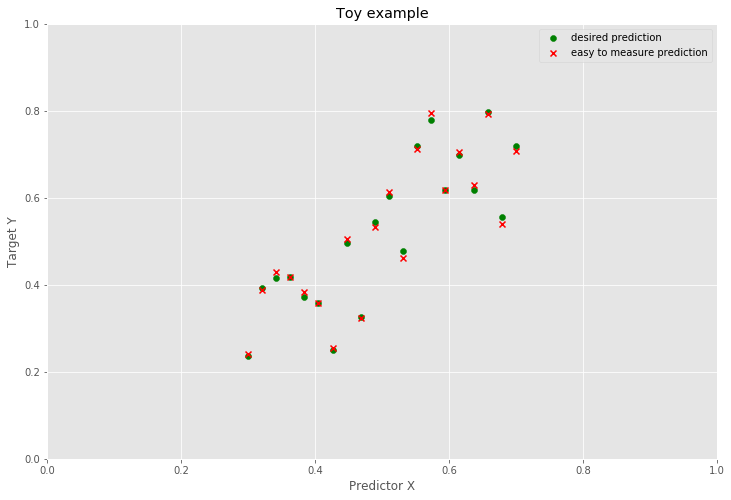

In [11]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x, y_want, color='green', label="desired prediction")
axs.scatter(x, y_easy, color='red', label="easy to measure prediction", marker='x')
axs.set_ylim(bottom=0, top=1)
axs.set_xlim(left=0, right=1)
axs.set_title('Toy example')
axs.legend()
axs.set_xlabel('Predictor X')
axs.set_ylabel('Target Y')

Text(0, 0.5, '$Y_{want}$')

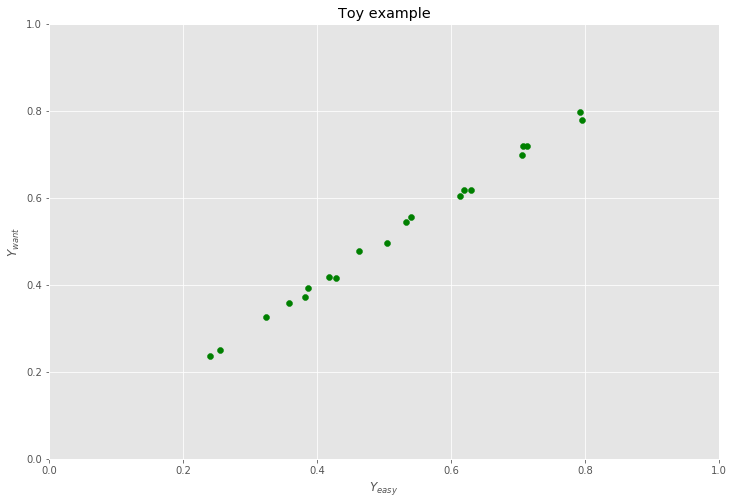

In [18]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(y_easy, y_want, color='green')
axs.set_ylim(bottom=0, top=1)
axs.set_xlim(left=0, right=1)
axs.set_title('Toy example')
axs.set_xlabel('$Y_{easy}$')
axs.set_ylabel('$Y_{want}$')